In [32]:
import random
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [33]:
seed = 42
random.seed(seed)

### Functions Definitions

In [34]:
def my_show_df_shape(df):
    print("Number of examples/rows: {:,}".format(df.shape[0]))
    print("Number of features: {:,}".format(df.shape[1]))

In [35]:
def my_show_df_NaNs(df):
    nan_count = df.isna().sum()
    # nan_count = nan_count[nan_count > 0]
    nan_percentage = df.isna().mean() * 100
    # nan_percentage = nan_percentage[nan_percentage > 0]
    length = 0
    for i in nan_count.index: 
        if len(i) > length:
            length = len(i) 
    if nan_count.empty:
        print("No NaN values found in the dataset.")
    else:
        print("Number of examples/rows:", df.shape[0])
        print("Number of features:", df.shape[1])
        print("Features with NaNs:")
        for i in range(len(nan_count)):
            feature = nan_count.index[i]
            if nan_count[feature] > 0:
                print(f"{feature:<{length+5}} {nan_count[feature]:<10} {nan_percentage[feature]:<8.4f}%")
            else:
                print(f"{feature:<{length+10}} no NaNs")

In [36]:
def my_show_df(df):
    nan_count = df.isna().sum()
    # nan_count = nan_count[nan_count > 0]
    nan_percentage = df.isna().mean() * 100
    # nan_percentage = nan_percentage[nan_percentage > 0]
    length = 0
    for i in nan_count.index: 
        if len(i) > length:
            length = len(i) 
    if nan_count.empty:
        print("No NaN values found in the dataset.")
    else:
        print("Number of examples/rows:", df.shape[0])
        print("Number of features:", df.shape[1])
        print("Features with NaNs:")
        for i in range(len(nan_count)):
            feature = nan_count.index[i]
            if nan_count[feature] > 0:
                print(f"{feature:<{length+5}} {nan_count[feature]:<10} {nan_percentage[feature]:<8.4f}%")
            else:
                print(f"{feature:<{length+10}} no NaNs")

### Dataset Load

In [37]:
# Load the dataset

filename = '../dataset/nmap-db.csv'
# p = 0.1  # 10% of the lines - Around 4M rows
# p = 0.0025  # 0,25% of the lines - Around 100k rows
df = pd.read_csv(
         filename,
         header=0,
         sep=',',
        #  skiprows=lambda i: i>0 and random.random() > p
)

In [38]:
df = df

### Initial Exploration

In [39]:
df

,Class.vendor_0,Class.OSfamily_0,Class.OSgen_0,Class.device_0,SEQ.SP_0,SEQ.GCD_0,SEQ.ISR_0,SEQ.TI_0,SEQ.TI_1,SEQ.CI_0,...,U1.RIPCK_0,U1.RUCK_0,U1.RUCK_1,U1.RUD_0,IE.R_0,IE.DFI_0,IE.T_0,IE.TG_0,IE.CD_0,IE.CD_1
0,Linux,Linux,NaN,WAP,258,3,264,I,-1,NO,...,NO,NO,-1,NO,NO,N,125,128,S,-1
1,Linux,Linux,2.4.X,specialized,211,2,208,Z,-1,Z,...,G,G,-1,G,NO,N,63,64,S,-1
2,Linux,Linux,2.6.X,specialized,0,64001,151,I,-1,I,...,G,G,-1,G,NO,S,68,64,Z,-1
3,Linux,Linux,2.6.X,specialized,1,128002,155,I,-1,I,...,G,G,-1,G,NO,S,59,64,Z,-1
4,Linux,Linux,2.6.X,specialized,1,192003,156,I,-1,I,...,G,G,-1,G,NO,S,61,64,Z,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38812,Linux,Linux,3.X,generalpurpose,259,2,265,Z,-1,RI,...,G,G,-1,G,NO,N,66,64,S,-1
38813,Microsoft,Windows,10,generalpurpose,250,3,264,I,-1,I,...,G,G,-1,G,NO,N,126,128,Z,-1
38814,Apple,macOS,10.15.X,generalpurpose,261,3,268,Z,-1,RD,...,G,NO,0,G,NO,S,67,64,S,-1
38815,FreeBSD,BSD,12.X,storage-misc,266,6,274,I,-1,I,...,G,G,-1,G,NO,S,60,64,S,-1


In [40]:
my_show_df_shape(df)

Number of examples/rows: 38,817
Number of features: 263


In [41]:
print(df.info())  # Get information about the dataset (e.g., column names, data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38817 entries, 0 to 38816
Columns: 263 entries, Class.vendor_0 to IE.CD_1
dtypes: int64(53), object(210)
memory usage: 77.9+ MB
None


In [42]:
print(df.head())  # Display the first few rows of the dataset

  Class.vendor_0 Class.OSfamily_0 Class.OSgen_0 Class.device_0  SEQ.SP_0  \
0          Linux            Linux           NaN            WAP       258   
1          Linux            Linux         2.4.X    specialized       211   
2          Linux            Linux         2.6.X    specialized         0   
3          Linux            Linux         2.6.X    specialized         1   
4          Linux            Linux         2.6.X    specialized         1   

   SEQ.GCD_0  SEQ.ISR_0 SEQ.TI_0  SEQ.TI_1 SEQ.CI_0  ...  U1.RIPCK_0  \
0          3        264        I        -1       NO  ...          NO   
1          2        208        Z        -1        Z  ...           G   
2      64001        151        I        -1        I  ...           G   
3     128002        155        I        -1        I  ...           G   
4     192003        156        I        -1        I  ...           G   

  U1.RUCK_0  U1.RUCK_1 U1.RUD_0 IE.R_0  IE.DFI_0 IE.T_0 IE.TG_0 IE.CD_0  \
0        NO         -1       NO    

In [43]:
columns_list = df.columns.tolist()
print(columns_list)  # Get the list of columns in the dataset

['Class.vendor_0', 'Class.OSfamily_0', 'Class.OSgen_0', 'Class.device_0', 'SEQ.SP_0', 'SEQ.GCD_0', 'SEQ.ISR_0', 'SEQ.TI_0', 'SEQ.TI_1', 'SEQ.CI_0', 'SEQ.CI_1', 'SEQ.II_0', 'SEQ.II_1', 'SEQ.SS_0', 'SEQ.TS_0', 'SEQ.TS_1', 'OPS.O1_0', 'OPS.O1_1', 'OPS.O1_2', 'OPS.O1_3', 'OPS.O1_4', 'OPS.O1_5', 'OPS.O1_6', 'OPS.O1_7', 'OPS.O1_8', 'OPS.O2_0', 'OPS.O2_1', 'OPS.O2_2', 'OPS.O2_3', 'OPS.O2_4', 'OPS.O2_5', 'OPS.O2_6', 'OPS.O2_7', 'OPS.O2_8', 'OPS.O3_0', 'OPS.O3_1', 'OPS.O3_2', 'OPS.O3_3', 'OPS.O3_4', 'OPS.O3_5', 'OPS.O3_6', 'OPS.O3_7', 'OPS.O3_8', 'OPS.O3_9', 'OPS.O3_10', 'OPS.O3_11', 'OPS.O4_0', 'OPS.O4_1', 'OPS.O4_2', 'OPS.O4_3', 'OPS.O4_4', 'OPS.O4_5', 'OPS.O4_6', 'OPS.O4_7', 'OPS.O4_8', 'OPS.O5_0', 'OPS.O5_1', 'OPS.O5_2', 'OPS.O5_3', 'OPS.O5_4', 'OPS.O5_5', 'OPS.O5_6', 'OPS.O5_7', 'OPS.O5_8', 'OPS.O6_0', 'OPS.O6_1', 'OPS.O6_2', 'OPS.O6_3', 'OPS.O6_4', 'OPS.O6_5', 'OPS.O6_6', 'WIN.W1_0', 'WIN.W2_0', 'WIN.W3_0', 'WIN.W4_0', 'WIN.W5_0', 'WIN.W6_0', 'ECN.R_0', 'ECN.DF_0', 'ECN.T_0', 'ECN.TG_0', 

In [44]:
column_names_by_dtype = {str(dtype): columns.to_list() for dtype, columns in df.columns.groupby(df.dtypes).items()}
for dtype, columns in column_names_by_dtype.items():
    print(f"{dtype} ({len(columns)})")
    print(columns)
    print()

int64 (53)
['SEQ.SP_0', 'SEQ.GCD_0', 'SEQ.ISR_0', 'SEQ.TI_1', 'SEQ.CI_1', 'SEQ.II_1', 'SEQ.TS_1', 'WIN.W1_0', 'WIN.W2_0', 'WIN.W3_0', 'WIN.W4_0', 'WIN.W5_0', 'WIN.W6_0', 'ECN.T_0', 'ECN.TG_0', 'ECN.W_0', 'T1.T_0', 'T1.TG_0', 'T1.RD_0', 'T2.T_0', 'T2.TG_0', 'T2.W_0', 'T2.RD_0', 'T3.T_0', 'T3.TG_0', 'T3.W_0', 'T3.RD_0', 'T4.T_0', 'T4.TG_0', 'T4.W_0', 'T4.RD_0', 'T5.T_0', 'T5.TG_0', 'T5.W_0', 'T5.RD_0', 'T6.T_0', 'T6.TG_0', 'T6.W_0', 'T6.RD_0', 'T7.T_0', 'T7.TG_0', 'T7.W_0', 'T7.RD_0', 'U1.T_0', 'U1.TG_0', 'U1.IPL_0', 'U1.UN_0', 'U1.RIPL_1', 'U1.RID_1', 'U1.RUCK_1', 'IE.T_0', 'IE.TG_0', 'IE.CD_1']

object (210)
['Class.vendor_0', 'Class.OSfamily_0', 'Class.OSgen_0', 'Class.device_0', 'SEQ.TI_0', 'SEQ.CI_0', 'SEQ.II_0', 'SEQ.SS_0', 'SEQ.TS_0', 'OPS.O1_0', 'OPS.O1_1', 'OPS.O1_2', 'OPS.O1_3', 'OPS.O1_4', 'OPS.O1_5', 'OPS.O1_6', 'OPS.O1_7', 'OPS.O1_8', 'OPS.O2_0', 'OPS.O2_1', 'OPS.O2_2', 'OPS.O2_3', 'OPS.O2_4', 'OPS.O2_5', 'OPS.O2_6', 'OPS.O2_7', 'OPS.O2_8', 'OPS.O3_0', 'OPS.O3_1', 'OPS.O3_2'

In [45]:
# Count the number of NaN values in the dataframe
nan_count = df.isna().sum().sum()

# Count the number of duplicated values in the dataframe
duplicated_count = df.duplicated().sum()

# Print the results
print("Number of NaN values:", nan_count)
print("Number of duplicated values:", duplicated_count)

Number of NaN values: 682
Number of duplicated values: 0


In [46]:
my_show_df_NaNs(df)

Number of examples/rows: 38817
Number of features: 263
Features with NaNs:
Class.vendor_0             no NaNs
Class.OSfamily_0           no NaNs
Class.OSgen_0         682        1.7570  %
Class.device_0             no NaNs
SEQ.SP_0                   no NaNs
SEQ.GCD_0                  no NaNs
SEQ.ISR_0                  no NaNs
SEQ.TI_0                   no NaNs
SEQ.TI_1                   no NaNs
SEQ.CI_0                   no NaNs
SEQ.CI_1                   no NaNs
SEQ.II_0                   no NaNs
SEQ.II_1                   no NaNs
SEQ.SS_0                   no NaNs
SEQ.TS_0                   no NaNs
SEQ.TS_1                   no NaNs
OPS.O1_0                   no NaNs
OPS.O1_1                   no NaNs
OPS.O1_2                   no NaNs
OPS.O1_3                   no NaNs
OPS.O1_4                   no NaNs
OPS.O1_5                   no NaNs
OPS.O1_6                   no NaNs
OPS.O1_7                   no NaNs
OPS.O1_8                   no NaNs
OPS.O2_0                   no NaNs
OPS.O2_

In [47]:
df.describe()

,SEQ.SP_0,SEQ.GCD_0,SEQ.ISR_0,SEQ.TI_1,SEQ.CI_1,SEQ.II_1,SEQ.TS_1,WIN.W1_0,WIN.W2_0,WIN.W3_0,...,U1.T_0,U1.TG_0,U1.IPL_0,U1.UN_0,U1.RIPL_1,U1.RID_1,U1.RUCK_1,IE.T_0,IE.TG_0,IE.CD_1
count,38817.000000,3.881700e+04,38817.000000,38817.0,38817.0,38817.0,38817.000000,38817.000000,38817.000000,38817.00000,...,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.000000,38817.0
mean,229.078239,1.051560e+04,238.878017,-1.0,-1.0,-1.0,7.155653,36013.026123,35980.559703,35959.31785,...,98.947781,95.093026,223.415411,0.574310,-0.960198,491.078162,395.555684,96.426308,92.617230,-1.0
std,48.072854,4.170794e+05,41.669920,0.0,0.0,0.0,8.628940,26731.935978,26752.490486,26773.85675,...,473.844725,65.590233,743.172047,72.077082,3.506793,4608.897477,4147.959960,474.096111,67.377598,0.0
min,-1.000000,-1.000000e+00,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
25%,205.000000,2.000000e+00,209.000000,-1.0,-1.0,-1.0,0.000000,5792.000000,5792.000000,5792.00000,...,62.000000,64.000000,56.000000,0.000000,-1.000000,-1.000000,-1.000000,61.000000,64.000000,-1.0
50%,251.000000,4.000000e+00,259.000000,-1.0,-1.0,-1.0,7.000000,32768.000000,32768.000000,32768.00000,...,66.000000,64.000000,176.000000,0.000000,-1.000000,-1.000000,-1.000000,66.000000,64.000000,-1.0
75%,259.000000,5.000000e+00,266.000000,-1.0,-1.0,-1.0,10.000000,65535.000000,65535.000000,65535.00000,...,124.000000,128.000000,356.000000,0.000000,-1.000000,-1.000000,-1.000000,123.000000,128.000000,-1.0
max,486.000000,1.677722e+07,416.000000,-1.0,-1.0,-1.0,34.000000,65535.000000,65535.000000,65535.00000,...,65409.000000,255.000000,25601.000000,12294.000000,308.000000,65528.000000,65355.000000,65409.000000,255.000000,-1.0


In [48]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38817 entries, 0 to 38816
Columns: 263 entries, Class.vendor_0 to IE.CD_1
dtypes: int64(53), object(210)
memory usage: 472.1 MB


#### Target Classes

In [49]:
target = 'Class.OSfamily_0'
# target = 'HTTP_Host_OS_Major_Version'
# target = 'HTTP_Host_OS_Minor_Version'
# target = 'HTTP_hostname'
targets = ['Class.OSfamily_0', 'Class.OSgen_0']

In [50]:
df[target].value_counts()

Class.OSfamily_0
Linux      16855
Windows     8094
macOS       4776
iOS         4032
BSD         3837
Solaris      830
Android      393
Name: count, dtype: int64

#### Histogram

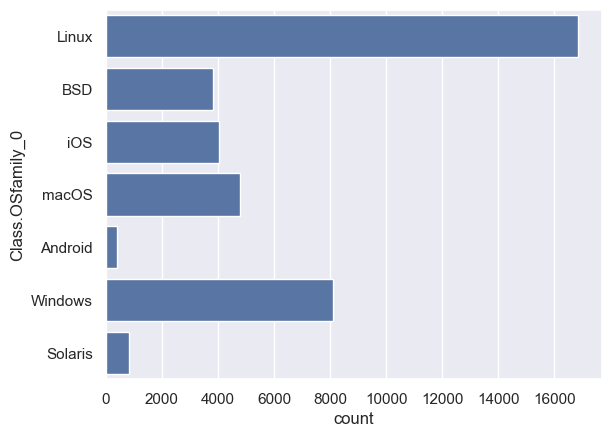

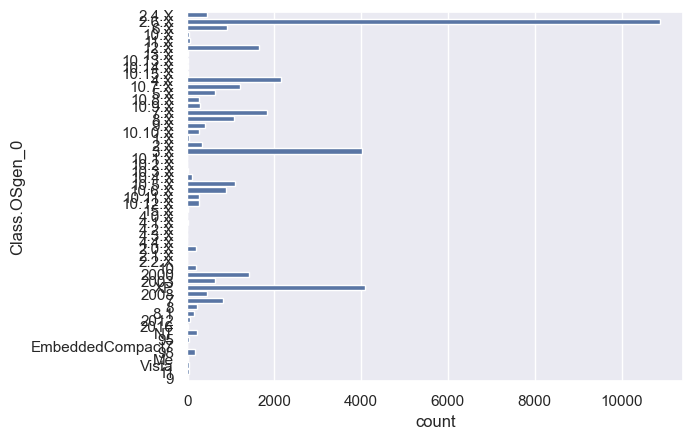

In [51]:
for column in targets:
    plt.xticks(rotation=0)
    sns.countplot(y=column, data=df)
    plt.show()

<Axes: xlabel='count'>

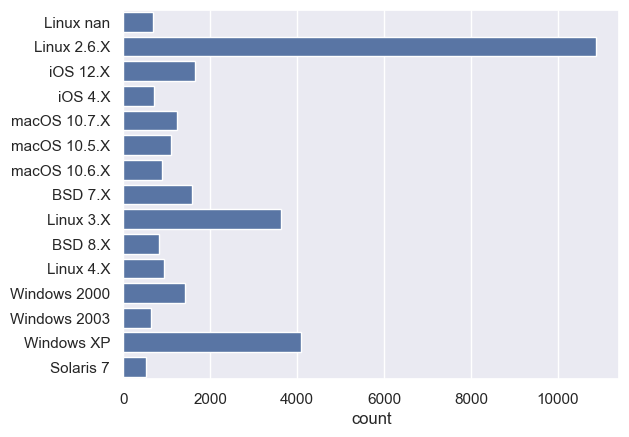

In [52]:
df_hist = df[targets[0]] + " " + df[targets[1]].astype(str)
top_10_values = df_hist.value_counts().head(15)
df_hist = df_hist[df_hist.isin(top_10_values.index)]
sns.countplot(data=df_hist)

In [53]:
df_family = df[targets[0]]
df_minor = df[targets[0]] + " " + df[targets[1]].astype(str)

In [54]:
df_family.nunique(), df_minor.nunique()

(7, 91)

In [24]:
# df_hist = df[targets[0]] + " " + df[targets[1]].astype(str) + " " + df[targets[2]].astype(str)
# top_10_values = df_hist.value_counts().head(15)
# df_hist = df_hist[df_hist.isin(top_10_values.index)]
# sns.countplot(data=df_hist)

### Preprocessing

In [25]:
my_show_df_shape(df)

Number of examples/rows: 38,817
Number of features: 263


In [26]:
df.dropna(subset=target, inplace=True)

In [27]:
my_show_df_shape(df)

Number of examples/rows: 38,817
Number of features: 263


In [28]:
df['OS target'] = df[targets[0]] + " " + df[targets[1]].astype(str)
df.drop(targets, axis=1, inplace=True)
target = 'OS target'

In [29]:
my_show_df_shape(df)

Number of examples/rows: 38,817
Number of features: 262


In [30]:
drop_columns = [
    "flow_ID",
    "UA OS patch",
    "UA OS patch minor",
    "ICMP TYPE",
    "TLS_ALPN",
    "TLS_ISSUER_CN",
    "TLS_SUBJECT_CN",
    "TLS_SUBJECT_ON",
    "Unnamed: 111"
]

df.drop(columns=drop_columns, inplace=True)

KeyError: "['flow_ID', 'UA OS patch', 'UA OS patch minor', 'ICMP TYPE', 'TLS_ALPN', 'TLS_ISSUER_CN', 'TLS_SUBJECT_CN', 'TLS_SUBJECT_ON', 'Unnamed: 111'] not found in axis"

In [ ]:
my_show_df_shape(df)

In [ ]:
drop_nans_rows = [
    "TCP SYN Size",
    "TCP Win Size"
]

df.dropna(subset=drop_nans_rows, 
          inplace=True)

In [ ]:
my_show_df_shape(df)

In [ ]:
my_show_df_NaNs(df)

In [ ]:
df.loc[df[target].str.contains('Other', na=False), target] = 'Other'

In [ ]:
df.loc[df[target].str.contains('iOS', na=False), target] = 'iOS'

In [ ]:
df.loc[df[target].str.contains('Android', na=False), target] = 'Android'

In [ ]:
df.loc[df[target].str.contains('Mac OS X', na=False), target] = 'Mac OS X'

In [ ]:
# df.loc[df[target].str.contains('Chrome OS', na=False), target] = 'Chrome OS'

In [ ]:
df.loc[df[target].str.contains('Windows (?!10|7)', regex=True, na=False), target] = 'Windows O'

In [ ]:
df.loc[~df[target].str.contains('(Windows|Android|iOS|Mac|Other)', regex=True, na=False), target] = 'Linux'

In [ ]:
df[target].value_counts()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
top = 30

top_values = df[target].value_counts().head(top)

plt.xticks(rotation=0)
sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index.sort_values())
plt.show()

plt.xticks(rotation=0)
sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index)
plt.show()

In [ ]:
plt.xticks(rotation=0)
ax = sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index.sort_values())
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

plt.xticks(rotation=0)
ax = sns.countplot(y=target, data=df[df[target].isin(top_values.index)], order=top_values.index)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include=['float', 'int'])
low_variance_columns = numeric_columns.columns[numeric_columns.var() <= 0]
print(low_variance_columns)
df.drop(columns=low_variance_columns, inplace=True)

In [ ]:
import openpyxl

description = df.describe()
description.to_excel('description.xlsx', index=True)

In [ ]:
my_show_df_NaNs(df)

In [ ]:
df["NPM_CLIENT_NETWORK_TIME"].value_counts()

### Split